## Option 1: Pyber

![Ride](Images/Ride.png)

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](Pyber/Pyber_Example.pdf) for a reference on expected format.

In [1]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import os

In [2]:
city_path = os.path.join("raw_data", "new_city_data.csv") 
ride_path = os.path.join("raw_data", "ride_data.csv") 

city_data = pd.read_csv(city_path)
ride_data = pd.read_csv(ride_path)

In [3]:
city_data

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban
5,South Josephville,4,Urban
6,West Sydneyhaven,70,Urban
7,Travisville,37,Urban
8,Torresshire,70,Urban
9,Lisaville,66,Urban


In [4]:
ride_data

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673
5,New Jeffrey,2016-02-22 18:36:25,36.01,9757888452346
6,Port Johnstad,2016-06-07 02:39:58,17.15,4352278259335
7,Jacobfort,2016-09-20 20:58:37,22.98,1500221409082
8,Travisville,2016-01-15 17:32:02,27.39,850152768361
9,Sandymouth,2016-11-16 07:27:00,21.61,2389035050524


In [5]:
full_data = city_data.merge(ride_data, how ='outer')
full_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


Text(0,0.5,'Average Fair($)')

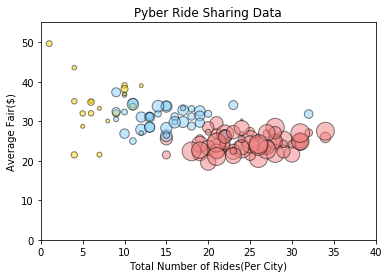

In [6]:
#* Average Fare ($) Per City
#* Total Number of Rides Per City
#* Total Number of Drivers Per City
#* City Type (Urban, Suburban, Rural)

#####################################################
# Works but doesn't (legend doesn't work)
# left here for future reference


avg_fare = full_data.groupby('city').agg({'fare': "mean"})['fare']
total_rides = full_data.groupby('city').agg({'city': "count"})['city']
total_drivers = full_data.groupby('city').agg({'driver_count': "first"})['driver_count']
city_type = full_data.groupby('city').agg({'type': "first"})['type']
#could also do this way city_type = full_data.groupby('city')['type'].first()

label = ('Rural','Suburban','Urban')
#color = ('Gold', '#87cefa','#f08080')

colors = {'Urban':'#f08080' , 'Suburban' : '#87cefa', 'Rural':'Gold'}

new_color = [colors[citype] for citype in city_type]

plt.scatter(total_rides,avg_fare, s=total_drivers*5, c = new_color,edgecolor ='black',alpha = .5)

plt.axis([0,40,0,55])
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fair($)')


In [7]:
avg_fare = full_data.groupby('city').agg({'fare': "mean"})['fare']
total_rides = full_data.groupby('city').agg({'city': "count"})['city']
total_drivers = full_data.groupby('city').agg({'driver_count': "first"})['driver_count']
city_type = full_data.groupby('city').agg({'type': "first"})['type']

my_dict = {
    'avg_fair':avg_fare,
    'total_rides':total_rides,
    'total_drivers':total_drivers,
    'city_type':city_type}
new_df = pd.DataFrame(my_dict)
new_groupyby = new_df.groupby('city_type')

In [15]:
new_df.head()

,avg_fair,city_type,total_drivers,total_rides
city,,,,
Alvarezhaven,23.928710,Urban,21,31
Alyssaberg,20.609615,Urban,67,26
Anitamouth,37.315556,Suburban,16,9
Antoniomouth,23.625000,Urban,21,22
Aprilchester,21.981579,Urban,49,19


Text(0,0.5,'Average Fair($)')

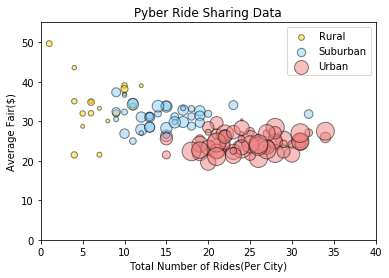

In [9]:
plt.scatter(new_groupyby.get_group('Rural')['total_rides'],
            new_groupyby.get_group('Rural')['avg_fair'],
            s=new_groupyby.get_group('Rural')['total_drivers']*5, 
            c = 'Gold',edgecolor ='black',alpha = .5,label='Rural')


plt.scatter(new_groupyby.get_group('Suburban')['total_rides'],
            new_groupyby.get_group('Suburban')['avg_fair'],
            s=new_groupyby.get_group('Suburban')['total_drivers']*5, 
            c = '#87cefa',edgecolor ='black',alpha = .5,label='Suburban')


plt.scatter(new_groupyby.get_group('Urban')['total_rides'],
            new_groupyby.get_group('Urban')['avg_fair'],
            s=new_groupyby.get_group('Urban')['total_drivers']*5, 
            c = '#f08080',edgecolor ='black',alpha = .5,label ='Urban')

plt.legend(loc = 'best')
plt.axis([0,40,0,55])
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fair($)')

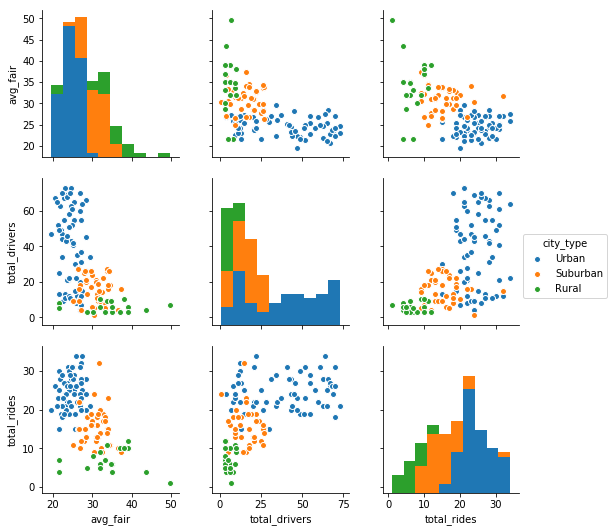

In [10]:
import seaborn as sns

sns.pairplot(data=new_df, hue="city_type",kind='scatter')

In [11]:
# In addition, you will be expected to produce the following three pie charts:

# % of Total Fares by City Type
# % of Total Rides by City Type
# % of Total Drivers by City Type

fares_by_type = full_data.groupby('type').agg({'fare':'sum'})
rides_by_type = full_data.groupby('type').agg({'ride_id' : 'count'})
drivers_by_type = full_data.groupby('type').agg({'driver_count': "first"})




Text(0.5,1,'% of Total Fares by City Type')

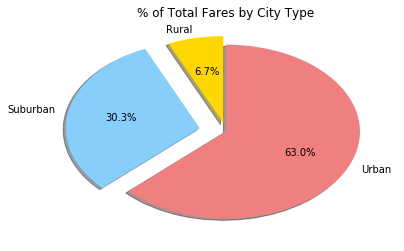

In [12]:
#fares_by_type = full_data.groupby('type').agg({'fare':'sum'})

explode = (0.1,0.2,0)
label = ('Rural','Suburban','Urban')
color = ('Gold', '#87cefa','#f08080')
plt.pie(fares_by_type, explode = explode, colors= color, labels = label,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title('% of Total Fares by City Type')

Text(0.5,1,'% of Total Rides by City Type')

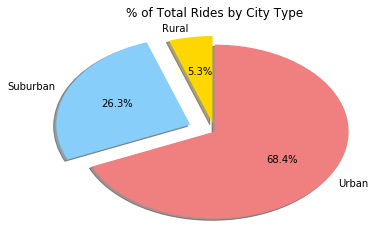

In [13]:
#rides_by_type = full_data.groupby('type').agg({'ride_id' : 'count'})

explode = (0.1,0.2,0)
color = ('Gold', '#87cefa','#f08080')
label = ('Rural','Suburban','Urban')

plt.pie(rides_by_type, explode=explode, colors = color, labels = label,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title('% of Total Rides by City Type')

Text(0.5,1,'% of Total Drivers by City Type')

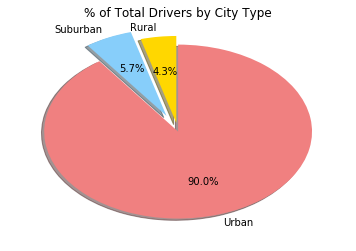

In [14]:
#drivers_by_type = full_data.groupby('type').agg({'driver_count': "first"})

explode = (0.1,0.2,0)
label = ('Rural','Suburban','Urban')
color = ('Gold', '#87cefa','#f08080')
plt.pie(drivers_by_type, explode=explode, colors= color, labels = label,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title('% of Total Drivers by City Type')

1) Looks like average fair goes down in a more pouplated environment, this could be due to destinations being closer in large cities
2) Data had a duplicate city in city_data.csv, could be an error so I removed the second occurance with a new csv file. I probably could have used drop_duplicate.
3) Urban had the largest percentage of drivers which could also account for the lower average fair.